### Higher Order Huen's

Huen's method for solving higher order IVP, e.g. 
$$y''' + py'' + qy' + sy = f(t).$$

To use the function, convert the IVP into the vector/matrix form where the matrix A contains the coefficient for the system $\vec{v}' = A\vec{v} + \vec{f}(t)$ and $\vec{f}(t)$ contains the function on the RHS of the problem (should have a non-zero coordinate in the last element).

In [74]:
import numpy as np

In [69]:
def huens_high_order(A, f, a, b, h, v0):
    mesh = np.arange(a+h,b+2*h,h)
    dim = len(mesh)
    IC = v0.copy()
    v_temp = np.empty((dim-1,3)) # interior solution points
    for (i,t) in enumerate(mesh[:-1]):
        t_next = mesh[i+1]
        v_tilde = v0 + h*(np.dot(A,v0) + f(t))
        v1 = v0 + (h/2)*( (np.dot(A,v0)+f(t)) + (np.dot(A,v_tilde) + f(t_next)) )
        v_temp[i,:] = v1
        v0 = v1

    y = np.vstack((IC,v_temp))[:,0]
    return y

#### Problem: 

$$y''' + 2y'' - y' - 2y = e^t;  0 \leq t \leq 3;  y(0)=1, y'(0)=2, y''(0)=0; h=0.1$$

In [79]:
def f(t):
    return np.array([0,0,np.exp(t)])

A = np.array([[0,1,0],[0,0,1],[2,1,-2]])
v0 = np.array([1,2,0])
a=0; b=3; h=0.1

v = huens_high_order(A, f, a, b, h, v0)

In [72]:
v

array([ 1.        ,  1.2       ,  1.40497897,  1.61939879,  1.84750231,
        2.09342487,  2.36129367,  2.655318  ,  2.97987323,  3.33958058,
        3.73938499,  4.18463262,  4.68114975,  5.23532468,  5.85419379,
        6.54553354,  7.31795944,  8.18103371,  9.14538284, 10.22282684,
       11.4265216 , 12.77111621, 14.27292725, 15.9501319 , 17.82298242,
       19.91404434, 22.24846112, 24.85424851, 27.76262187, 31.00836017,
       34.63021108])

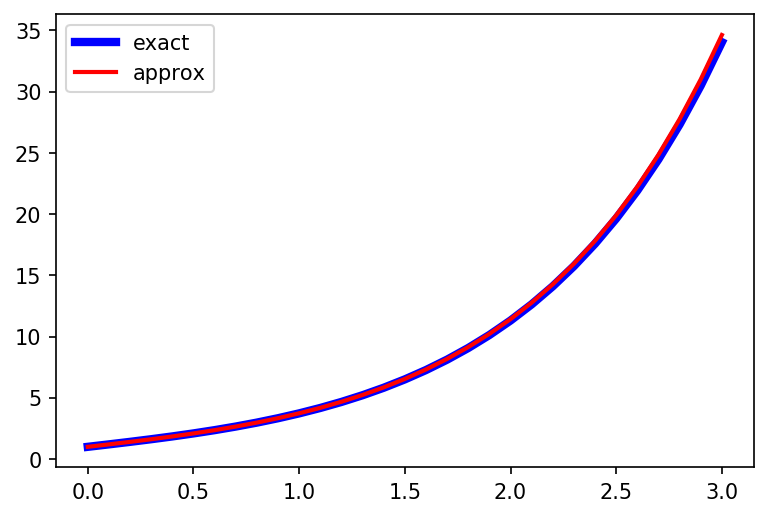

In [77]:
# plot to compare the approximation with the true solution
import matplotlib.pyplot as plt

def y_exact(t):
    return (43/36)*np.exp(t) + (1/4)*np.exp(-t) - (4/9)*np.exp(-2*t) + (1/6)*t*np.exp(t)

X = np.arange(a,b+h,h)
y_true = [y_exact(x) for x in X]

plt.figure(dpi=150)
plt.plot(X,y_true, lw=4, c='b',label='exact')
plt.plot(X,v, lw=2, c='r',label='approx')
plt.legend()
plt.show()